In [48]:
graphics_toolkit ("gnuplot");

x = load('ex1x.dat');
y = load('ex1y.dat');
disp(x)


   2.0659
   2.3684
   2.5400
   2.5421
   2.5491
   2.7867
   2.9117
   3.0356
   3.1147
   3.1582
   3.3276
   3.3793
   3.4122
   3.4216
   3.5316
   3.6393
   3.6733
   3.9256
   4.0499
   4.2483
   4.3440
   4.3827
   4.4231
   4.6102
   4.6881
   4.9777
   5.0360
   5.0685
   5.4161
   5.4396
   5.4563
   5.5698
   5.6016
   5.6878
   5.7216
   5.8539
   6.1978
   6.3511
   6.4797
   6.7384
   6.8638
   7.0223
   7.0782
   7.1514
   7.4664
   7.5974
   7.7441
   7.7730
   7.8265
   7.9306


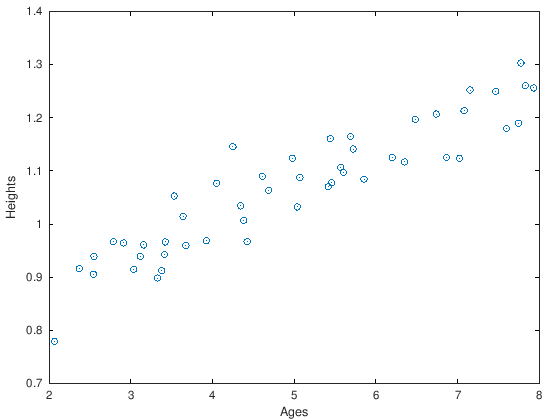

In [37]:
figure
plot (x, y, 'o' ) ;
ylabel (  'Heights' );
xlabel ('Ages');

In [28]:
m = length(y); % store the number of training examples
X = [ones(m, 1), x]; % Add a column of ones to x

In [11]:
printf("%f", m)

50.000000

In [16]:
theta = zeros(2, 1);
disp(theta)

   0
   0


In [46]:
iterations = 150;
alpha = 0.07;

In [18]:
function J = computeCost(X, y, theta)
    m = length(y);

    J = 0;


    predictions = X*theta;
    sqrErrors   = (predictions - y).^2;

    J = 1/(2*m) * sum(sqrErrors);
end

In [19]:
function [theta, J_history,iterationcount] = gradientDescent(X , y, theta, alpha, num_iters)

m = length(y);
J_history = zeros(num_iters, 1);
iterationcount=zeros(num_iters, 1);
for iter = 1:num_iters
    x = X (:,2);
  
    h = theta(1) + (theta(2)*x);

    theta_zero = theta(1) - alpha * (1/m) * sum(h-y);
    theta_one  = theta(2) - alpha * (1/m) * sum((h - y) .* x);

    theta = [theta_zero; theta_one];
    %fprintf('%f\n', theta);
    J_history(iter)= computeCost(X, y, theta);
    iterationcount(iter)=iter;
end

 
end

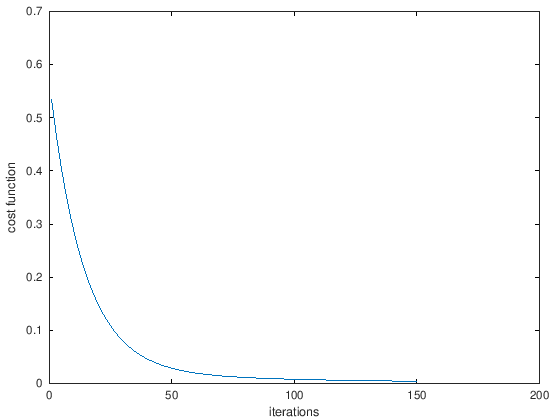

In [47]:
[result, cost, count] = gradientDescent(X , y, theta, alpha, iterations);

% hold on
figure
plot(count, cost);
ylabel("cost function");
xlabel("iterations");
   